In [27]:
from IPython.display import HTML, display

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import typing
import csv

In [28]:
#   main part
csv_list = [
    "../khudalagse/final_new.csv",
    "../metroman/final_new.csv",
    "../petuk-couple/final_new.csv",
    "../rafsan/final_new.csv",
    "../zoltanbd/final_new.csv",
]


def analyze_features(csv_path: str, df=None):

    if csv_path is not None:
        display(HTML(f"\n<h3>{csv_path}</h3>"))
        df = pd.read_csv(csv_path)

    df = df
    #   remove columns that we don't need
    df = df.drop(columns=[
        "Likes",
        "Comments",
        "Shares",
        "comment_total",
        # "comment_pos",
        # "comment_neg",
        "time_slot",
        # "Love",
        # "Wow",
        # "Haha",
        # "Sad",
        # "Angry",
        # "Care",
        "polarity_class",
        "Score",
    ])

    corr_mat = df.corr()
    corr_mat = np.round(corr_mat, 2)

    hmap = sns.heatmap(corr_mat,
                    annot=True,
                    xticklabels=corr_mat.columns.values,
                    yticklabels=corr_mat.columns.values)
    
    if csv_path is None:
        title = "Merged_Pages.csv"
    else:
        title = f"{csv_path.split('/')[1]}.csv"

    plt.title(title)
    plt.show(hmap)
    plt.clf()


def create_mega_csv(csv_list: list):

    df_list = []
    for each_csv in csv_list:
        df = pd.read_csv(each_csv)
        df_list.append(df)

    df_mega = pd.concat(df_list)
    return df_mega

## Merged Data Analysis

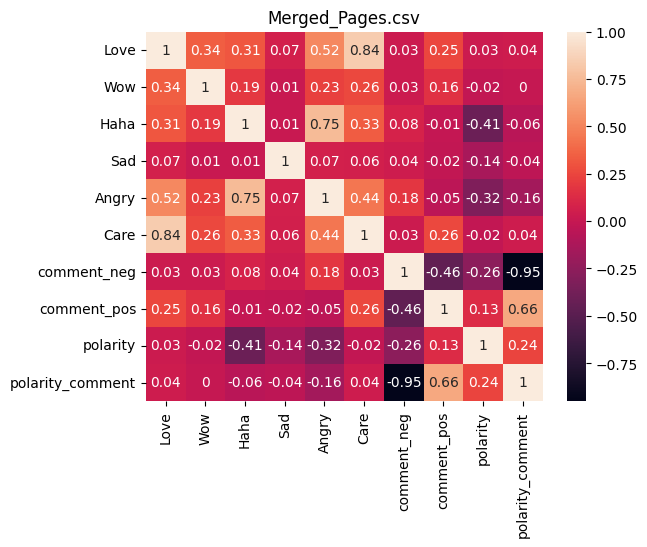

0      7
1      7
2      7
3      7
4      7
      ..
173    5
174    3
175    6
176    3
177    2
Name: polarity_class, Length: 905, dtype: int64
Total shape: (905, 25)
Total downloaded comments: 26004


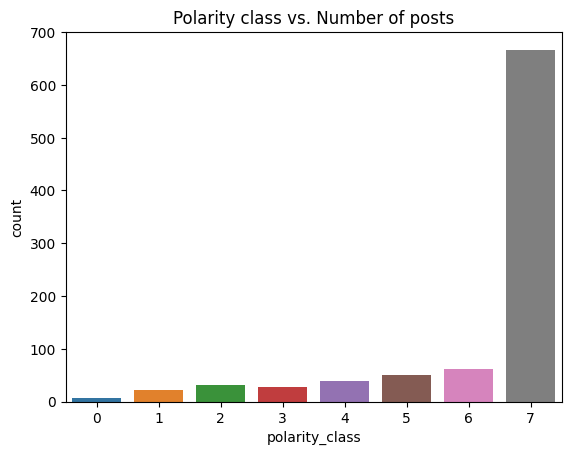

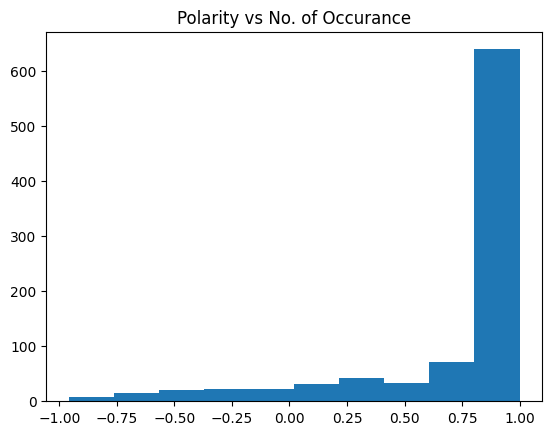

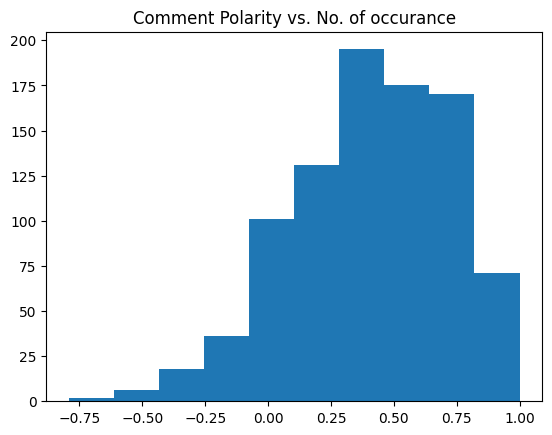

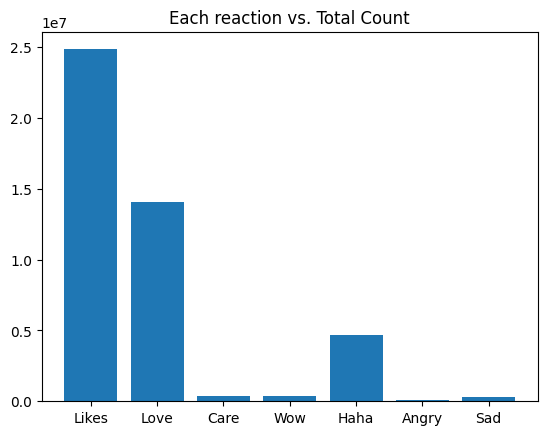

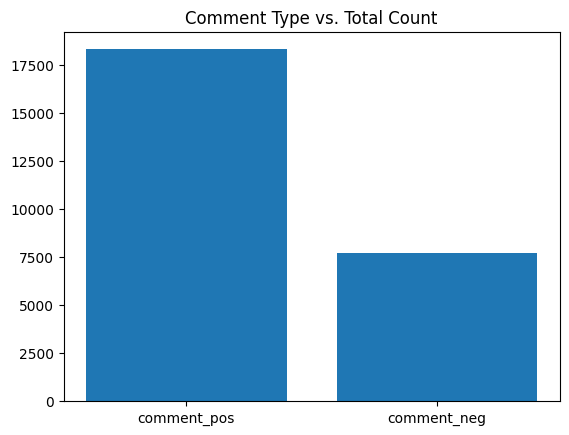

In [29]:
df_mega = create_mega_csv(csv_list)
analyze_features(csv_path=None, df=df_mega)

print(df_mega["polarity_class"])
df_mega.to_csv("../merged_csv.csv", index=False, quoting=csv.QUOTE_ALL)

#   basic stats
print(f"Total shape: {df_mega.shape}")
print(f"Total downloaded comments: {df_mega['comment_total'].sum()}")

plt.title("Polarity class vs. Number of posts")
sns.countplot(df_mega, x=df_mega["polarity_class"])
plt.show()
plt.cla()

df_mega["polarity"].hist(
    grid=False,
)
plt.title("Polarity vs No. of Occurance")
plt.show()
plt.cla()


df_mega["polarity_comment"].hist(
    grid=False,
)
plt.title("Comment Polarity vs. No. of occurance")
plt.show()
plt.cla()


X_label = [ "Likes", "Love", "Care", "Wow", "Haha", "Angry", "Sad" ]
y_label = [ df_mega["Likes"].sum(), 
           df_mega["Love"].sum(), 
           df_mega["Care"].sum(), 
           df_mega["Wow"].sum(), 
           df_mega["Haha"].sum(), 
           df_mega["Angry"].sum(), 
           df_mega["Sad"].sum() 
        ]

plt.title("Each reaction vs. Total Count")
plt.bar(X_label, y_label)
plt.show()


X_label = [ "comment_pos", "comment_neg" ]
y_label = [
    df_mega["comment_pos"].sum(), 
    df_mega["comment_neg"].sum(), 
]

plt.title("Comment Type vs. Total Count")
plt.bar(X_label, y_label)
plt.show()



## Basic Stats

In [30]:
total_comments = df_mega["comment_total"].sum()
print("Total downloaded comment:", total_comments)

df_mega.describe()

Total downloaded comment: 26004


,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Score,comment_neg,comment_pos,comment_total,time_slot,polarity,polarity_class,polarity_comment
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,27458.301657,1253.795580,665.331492,15563.321547,399.930387,5135.846409,300.462983,64.864088,422.406630,-1.035514,8.510497,20.223204,28.733702,11.334807,0.724058,6.203315,0.411477
std,40046.992194,2645.387948,1740.745395,28879.766932,2361.646076,28343.568171,4699.478102,188.966876,1164.899385,11.471880,4.769945,6.386770,5.971802,3.052917,0.427667,1.615943,0.315050
min,169.000000,6.000000,3.000000,36.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-129.460000,0.000000,2.000000,2.000000,3.000000,-0.959979,0.000000,-0.793103
25%,6076.000000,228.000000,85.000000,1660.000000,38.000000,58.000000,4.000000,7.000000,48.000000,-1.650000,5.000000,17.000000,29.000000,9.000000,0.724689,6.000000,0.230769
50%,14973.000000,553.000000,202.000000,5549.000000,95.000000,202.000000,11.000000,18.000000,133.000000,1.230000,8.000000,20.000000,29.000000,10.000000,0.932525,7.000000,0.448276
75%,32680.000000,1207.000000,518.000000,14817.000000,300.000000,1004.000000,31.000000,51.000000,343.000000,2.290000,11.000000,24.000000,30.000000,14.000000,0.966005,7.000000,0.655172
max,493989.000000,50095.000000,26804.000000,259826.000000,67252.000000,515966.000000,114915.000000,2843.000000,23968.000000,35.410000,27.000000,54.000000,59.000000,24.000000,1.000000,7.000000,1.000000


## Individual CSV Analysis

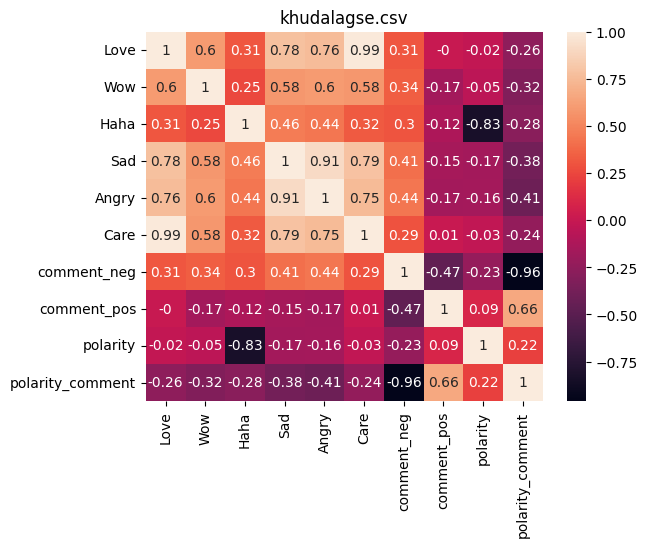

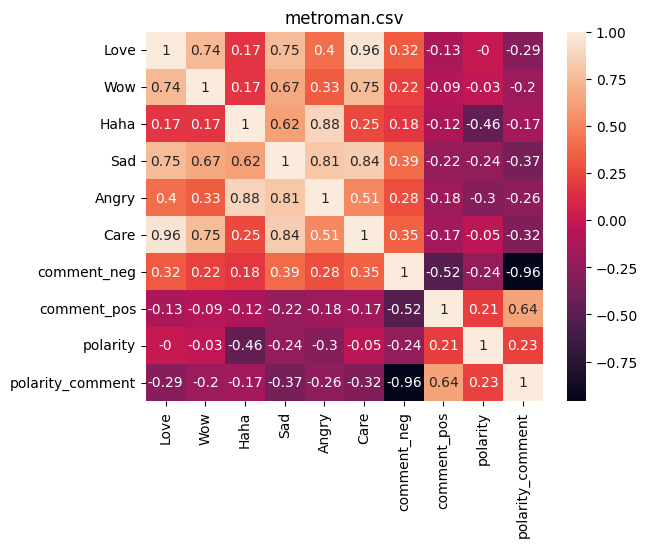

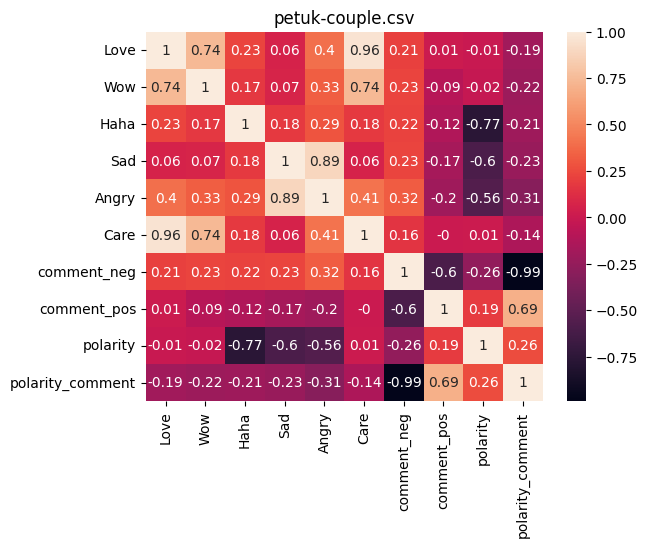

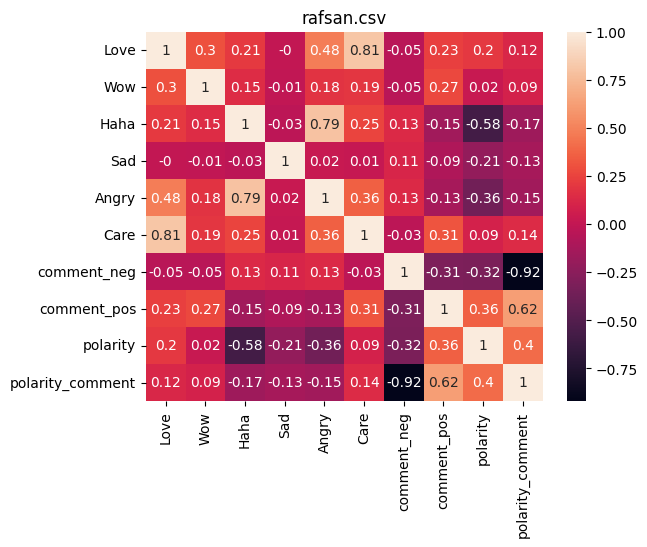

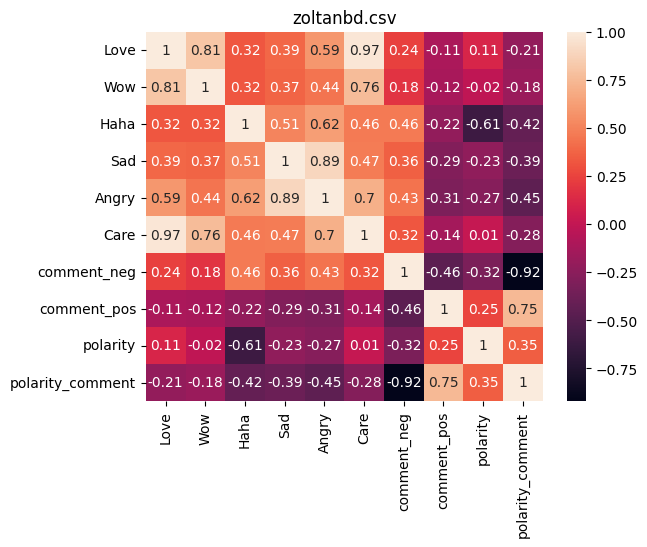

<Figure size 640x480 with 0 Axes>

In [31]:
for each_csv in csv_list:
    analyze_features(each_csv)